In [1]:
# All imports
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

In [2]:
#Read df from csv
df = pd.read_csv("AtomicData.csv",delimiter="|")

C:\Users\monic\AppData\Local\Temp\ipykernel_21028\614005866.py:2: DtypeWarning: Columns (46,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AtomicData.csv",delimiter="|")


In [3]:
# Checking all the columns in the dataframe
df.columns

Index(['colorIdentity', 'colors', 'convertedManaCost', 'foreignData', 'layout',
       'manaValue', 'name', 'printings', 'rulings', 'subtypes', 'supertypes',
       'text', 'type', 'types', 'identifiers.scryfallOracleId',
       'legalities.standard', 'legalities.future', 'legalities.historic',
       'legalities.gladiator', 'legalities.pioneer', 'legalities.explorer',
       'legalities.modern', 'legalities.legacy', 'legalities.pauper',
       'legalities.vintage', 'legalities.penny', 'legalities.commander',
       'legalities.brawl', 'legalities.historicbrawl', 'legalities.alchemy',
       'legalities.paupercommander', 'legalities.duel', 'legalities.premodern',
       'purchaseUrls.tcgplayer', 'purchaseUrls.cardKingdom',
       'purchaseUrls.cardKingdomFoil', 'edhrecRank', 'loyalty', 'manaCost',
       'leadershipSkills.brawl', 'leadershipSkills.commander',
       'leadershipSkills.oathbreaker', 'purchaseUrls.cardmarket', 'power',
       'toughness', 'keywords', 'hasAlternativeDeckLi

In [4]:
# Checking how the dataframe looks like
df.head(3)

,colorIdentity,colors,convertedManaCost,foreignData,layout,manaValue,name,printings,rulings,subtypes,...,purchaseUrls.cardKingdomEtched,identifiers.scryfallId,identifiers.scryfallIllustrationId,identifiers.mtgjsonV4Id,identifiers.tcgplayerProductId,isReserved,asciiName,legalities.oldschool,hand,life
0,['W'],[],0.0,"[{'name': 'Ebene', 'type': 'Standardland — Ebe...",normal,0.0,Plains,"['10E', '2ED', '2XM', '3ED', '4BB', '4ED', '5E...",[],['Plains'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,['U'],[],0.0,"[{'name': 'Insel', 'type': 'Standardland — Ins...",normal,0.0,Island,"['10E', '2ED', '2XM', '3ED', '4BB', '4ED', '5E...",[],['Island'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,['B'],[],0.0,"[{'name': 'Sumpf', 'type': 'Standardland — Sum...",normal,0.0,Swamp,"['10E', '2ED', '2XM', '3ED', '4BB', '4ED', '5E...",[],['Swamp'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Number of rows (cards)
len(df)

24633

In [6]:
# Drop columns we won't be using
droplist = ['identifiers.scryfallId',
            'purchaseUrls.cardmarket',
            'hand',
            'life',
            'purchaseUrls.tcgplayer',
            'identifiers.tcgplayerProductId',
            'identifiers.mtgjsonV4Id',
            'identifiers.scryfallIllustrationId',
            'purchaseUrls.cardKingdomEtched',
            'purchaseUrls.tcgplayerEtched',
            'hasAlternativeDeckLimit',
            'leadershipSkills.oathbreaker',
            'leadershipSkills.commander',
            'leadershipSkills.brawl',
            'edhrecRank',
            'purchaseUrls.cardKingdomFoil',
            'purchaseUrls.cardKingdom',
            'purchaseUrls.tcgplayer',
            'identifiers.scryfallOracleId',
            'printings',
            'rulings',
            'foreignData',
            'asciiName',
            'isReserved',
            'colorIndicator',
            'side',
            'manaCost', #the mana cost per type of mana (ex: "{1}{B}")
            'colors',
            'faceConvertedManaCost',
            'convertedManaCost']

df.drop(droplist,axis=1,inplace=True)

In [7]:
df.head()

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,legalities.standard,...,legalities.paupercommander,legalities.duel,legalities.premodern,loyalty,power,toughness,keywords,faceName,faceManaValue,legalities.oldschool
0,['W'],normal,0.0,Plains,['Plains'],['Basic'],({T}: Add {W}.),Basic Land — Plains,['Land'],Legal,...,Legal,Legal,Legal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,['U'],normal,0.0,Island,['Island'],['Basic'],({T}: Add {U}.),Basic Land — Island,['Land'],Legal,...,Legal,Legal,Legal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,['B'],normal,0.0,Swamp,['Swamp'],['Basic'],({T}: Add {B}.),Basic Land — Swamp,['Land'],Legal,...,Legal,Legal,Legal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,['R'],normal,0.0,Mountain,['Mountain'],['Basic'],({T}: Add {R}.),Basic Land — Mountain,['Land'],Legal,...,Legal,Legal,Legal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,['G'],normal,0.0,Forest,['Forest'],['Basic'],({T}: Add {G}.),Basic Land — Forest,['Land'],Legal,...,Legal,Legal,Legal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# All columns related to the card's legality in any of the formats
legalities = ['legalities.standard', 
              'legalities.future', 
              'legalities.historic',
              'legalities.gladiator', 
              'legalities.pioneer', 
              'legalities.explorer',
              'legalities.modern', 
              'legalities.legacy', 
              'legalities.pauper',
              'legalities.vintage', 
              'legalities.penny', 
              'legalities.commander',
              'legalities.brawl', 
              'legalities.historicbrawl', 
              'legalities.alchemy',
              'legalities.paupercommander', 
              'legalities.duel', 
              'legalities.premodern',
              'legalities.oldschool']

In [9]:
# Summarize the information from all the legality columns into a single column 
df["Legality"] = df[legalities].fillna('N/A').apply("|".join, axis=1)

In [10]:
df["Legality"]

0        Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
1        Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
2        Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
3        Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
4        Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
                               ...                        
24628    N/A|N/A|N/A|N/A|N/A|N/A|N/A|Legal|N/A|Legal|N/...
24629    N/A|N/A|N/A|N/A|N/A|N/A|N/A|Legal|N/A|Legal|N/...
24630    N/A|N/A|N/A|N/A|N/A|N/A|N/A|Legal|N/A|Legal|N/...
24631    N/A|N/A|N/A|N/A|N/A|N/A|N/A|Legal|N/A|Legal|N/...
24632    N/A|N/A|N/A|N/A|N/A|N/A|N/A|Legal|N/A|Legal|N/...
Name: Legality, Length: 24633, dtype: object

In [11]:
# Drop all the other legality columns
df.drop(legalities,axis=1,inplace=True)

In [12]:
df.head()

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,loyalty,power,toughness,keywords,faceName,faceManaValue,Legality
0,['W'],normal,0.0,Plains,['Plains'],['Basic'],({T}: Add {W}.),Basic Land — Plains,['Land'],NaN,NaN,NaN,NaN,NaN,NaN,Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
1,['U'],normal,0.0,Island,['Island'],['Basic'],({T}: Add {U}.),Basic Land — Island,['Land'],NaN,NaN,NaN,NaN,NaN,NaN,Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
2,['B'],normal,0.0,Swamp,['Swamp'],['Basic'],({T}: Add {B}.),Basic Land — Swamp,['Land'],NaN,NaN,NaN,NaN,NaN,NaN,Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
3,['R'],normal,0.0,Mountain,['Mountain'],['Basic'],({T}: Add {R}.),Basic Land — Mountain,['Land'],NaN,NaN,NaN,NaN,NaN,NaN,Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...
4,['G'],normal,0.0,Forest,['Forest'],['Basic'],({T}: Add {G}.),Basic Land — Forest,['Land'],NaN,NaN,NaN,NaN,NaN,NaN,Legal|Legal|Legal|Legal|Legal|Legal|Legal|Lega...


In [13]:
# Keep in the dataframe only cards that are legal in AT LEAST one of the formats. This way we are removing 'joke' cards and 'promotional' cards.
df = df.loc[(df['Legality'].astype(str).str.contains("Legal"))]

# Then, we don't need the 'Legality' column anymore
df = df.drop('Legality',axis=1)

In [14]:
# Number of cards that are legal in at least 1 format
len(df)

23929

In [15]:
# For double sided cards, the name represents both sides of the card, while the faceName represents the name of 1 side of the card.
# If we want each row to represent a single individual and unique card, then we need to use faceName instead of name (as a primary key).
df[df['name']=="Rune-Tail, Kitsune Ascendant // Rune-Tail's Essence"]

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,loyalty,power,toughness,keywords,faceName,faceManaValue
548,['W'],flip,3.0,"Rune-Tail, Kitsune Ascendant // Rune-Tail's Es...","['Fox', 'Monk']",['Legendary'],"When you have 30 or more life, flip Rune-Tail,...",Legendary Creature — Fox Monk,['Creature'],NaN,2,2,NaN,"Rune-Tail, Kitsune Ascendant",NaN
549,['W'],flip,3.0,"Rune-Tail, Kitsune Ascendant // Rune-Tail's Es...",[],['Legendary'],Prevent all damage that would be dealt to crea...,Legendary Enchantment,['Enchantment'],NaN,NaN,NaN,NaN,Rune-Tail's Essence,NaN


In [16]:
# For all rows, whenever faceName is null (whenever the card isn't double sided), let's have faceName = name
# This way, faceName will always be a primary key
# Let us do the same for faceManaValue: whenever null, we = to manaValue
df.loc[df['faceName'].isnull(), 'faceName'] = df['name']
df.loc[df['faceManaValue'].isnull(), 'faceManaValue'] = df['manaValue']

In [17]:
# Check if we have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23929 entries, 0 to 24632
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   colorIdentity  23929 non-null  object 
 1   layout         23929 non-null  object 
 2   manaValue      23929 non-null  float64
 3   name           23929 non-null  object 
 4   subtypes       23929 non-null  object 
 5   supertypes     23929 non-null  object 
 6   text           23593 non-null  object 
 7   type           23929 non-null  object 
 8   types          23929 non-null  object 
 9   loyalty        263 non-null    object 
 10  power          12984 non-null  object 
 11  toughness      12984 non-null  object 
 12  keywords       10495 non-null  object 
 13  faceName       23929 non-null  object 
 14  faceManaValue  23929 non-null  float64
dtypes: float64(2), object(13)
memory usage: 3.4+ MB


<AxesSubplot:>

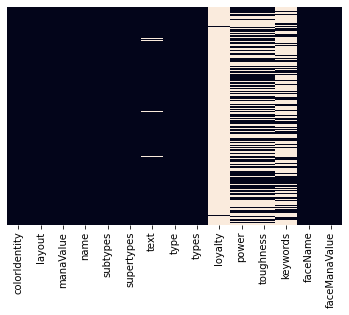

In [18]:
# Check if we have null values (heatmap version)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [19]:
# Some cards don't have text (rules), only text (flavor). Example: https://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=382325 
df[df['text'].isnull()].head(3)

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,loyalty,power,toughness,keywords,faceName,faceManaValue
32,['W'],normal,4.0,Pillarfield Ox,['Ox'],[],NaN,Creature — Ox,['Creature'],NaN,2,4,NaN,Pillarfield Ox,4.0
38,['W'],normal,5.0,Siege Mastodon,['Elephant'],[],NaN,Creature — Elephant,['Creature'],NaN,3,5,NaN,Siege Mastodon,5.0
48,['U'],normal,5.0,Armored Cancrix,['Crab'],[],NaN,Creature — Crab,['Creature'],NaN,2,5,NaN,Armored Cancrix,5.0


In [20]:
# For these cards, we replace every nan value with a blank ''
df.loc[df['text'].isnull(), 'text'] = ''

In [21]:
# In the cases when the card is not a Planeswalker, 'loyalty' will be nan. In those cases, we replace nan by 'N/A' (non-applicable)
df.loc[df['loyalty'].isnull(), 'loyalty'] = 'N/A'

In [22]:
# Cards that aren't creatures won't have power/toughness. In those cases, we replace nan by 'N/A'
df.loc[df['power'].isnull(), 'power'] = 'N/A'
df.loc[df['toughness'].isnull(), 'toughness'] = 'N/A'

In [23]:
# Not all cards will have keywords.
# Creatures without keywords:  we replace nan by 'None'
df.loc[(df['types'].astype(str).str.contains("Creature")) & df['keywords'].isnull(), 'keywords'] = "['None']"
# Non-creature cards: we replace nan by 'N/A'
df.loc[df['keywords'].isnull(), 'keywords'] = "['N/A']"

In [24]:
df.head()

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,loyalty,power,toughness,keywords,faceName,faceManaValue
0,['W'],normal,0.0,Plains,['Plains'],['Basic'],({T}: Add {W}.),Basic Land — Plains,['Land'],N/A,N/A,N/A,['N/A'],Plains,0.0
1,['U'],normal,0.0,Island,['Island'],['Basic'],({T}: Add {U}.),Basic Land — Island,['Land'],N/A,N/A,N/A,['N/A'],Island,0.0
2,['B'],normal,0.0,Swamp,['Swamp'],['Basic'],({T}: Add {B}.),Basic Land — Swamp,['Land'],N/A,N/A,N/A,['N/A'],Swamp,0.0
3,['R'],normal,0.0,Mountain,['Mountain'],['Basic'],({T}: Add {R}.),Basic Land — Mountain,['Land'],N/A,N/A,N/A,['N/A'],Mountain,0.0
4,['G'],normal,0.0,Forest,['Forest'],['Basic'],({T}: Add {G}.),Basic Land — Forest,['Land'],N/A,N/A,N/A,['N/A'],Forest,0.0


In [25]:
# Confirm that we got rid of all the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23929 entries, 0 to 24632
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   colorIdentity  23929 non-null  object 
 1   layout         23929 non-null  object 
 2   manaValue      23929 non-null  float64
 3   name           23929 non-null  object 
 4   subtypes       23929 non-null  object 
 5   supertypes     23929 non-null  object 
 6   text           23929 non-null  object 
 7   type           23929 non-null  object 
 8   types          23929 non-null  object 
 9   loyalty        23929 non-null  object 
 10  power          23929 non-null  object 
 11  toughness      23929 non-null  object 
 12  keywords       23929 non-null  object 
 13  faceName       23929 non-null  object 
 14  faceManaValue  23929 non-null  float64
dtypes: float64(2), object(13)
memory usage: 3.4+ MB


<AxesSubplot:>

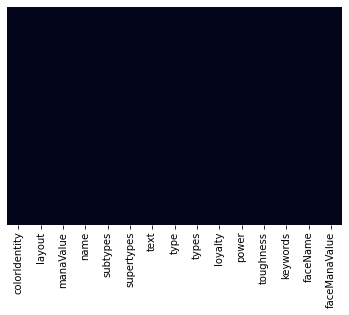

In [26]:
# Confirm that we got rid of all the null values (heatmap version)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [27]:
# Checking if faceName is a primary key (as intended)
print(len(df),len(df['faceName'].unique()))

23929 23924


In [28]:
#We have 5 duplicate faceNames. Why?
df[df['faceName'].duplicated()]

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,loyalty,power,toughness,keywords,faceName,faceManaValue
1479,[],normal,2.0,Krark's Thumb,[],['Legendary'],"If you would flip a coin, instead flip two coi...",Legendary Artifact,['Artifact'],N/A,N/A,N/A,['N/A'],Krark's Thumb,2.0
4637,['U'],normal,3.0,Propaganda,[],[],Creatures can't attack you unless their contro...,Enchantment,['Enchantment'],N/A,N/A,N/A,['N/A'],Propaganda,3.0
12385,['U'],normal,5.0,"Zndrsplt, Eye of Wisdom",['Homunculus'],['Legendary'],"Partner with Okaun, Eye of Chaos (When this cr...",Legendary Creature — Homunculus,['Creature'],N/A,1,4,"['Partner', 'Partner with']","Zndrsplt, Eye of Wisdom",5.0
12386,['R'],normal,5.0,"Okaun, Eye of Chaos","['Cyclops', 'Berserker']",['Legendary'],"Partner with Zndrsplt, Eye of Wisdom (When thi...",Legendary Creature — Cyclops Berserker,['Creature'],N/A,3,3,"['Partner', 'Partner with']","Okaun, Eye of Chaos",5.0
21687,"['R', 'U']",normal,3.0,Stitch in Time,[],[],"Flip a coin. If you win the flip, take an extr...",Sorcery,['Sorcery'],N/A,N/A,N/A,['N/A'],Stitch in Time,3.0


In [29]:
# Let's look at one of them in specific
df[df['faceName']=='Stitch in Time']
# It seems like this card was printed as a double sided card, but both sides were the same!
# https://scryfall.com/card/sld/382/stitch-in-time-stitch-in-time?back

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,loyalty,power,toughness,keywords,faceName,faceManaValue
1167,"['R', 'U']",reversible_card,3.0,Stitch in Time // Stitch in Time,[],[],"Flip a coin. If you win the flip, take an extr...",Sorcery,['Sorcery'],N/A,N/A,N/A,['N/A'],Stitch in Time,3.0
21687,"['R', 'U']",normal,3.0,Stitch in Time,[],[],"Flip a coin. If you win the flip, take an extr...",Sorcery,['Sorcery'],N/A,N/A,N/A,['N/A'],Stitch in Time,3.0


In [30]:
# As it turns out, these 5 cards were all printed as double sided single cards (both sides were the same card, but with different artworks)
# For a special collector's edition called "Secret Lair Drop (SLD)"
# So let's drop them manually:

doublecard = ["Stitch in Time // Stitch in Time",
            "Krark's Thumb // Krark's Thumb",
            "Okaun, Eye of Chaos // Okaun, Eye of Chaos",
            "Propaganda // Propaganda",
            "Zndrsplt, Eye of Wisdom // Zndrsplt, Eye of Wisdom"]

for dob in doublecard:
    df.drop(df[df['name'] == dob].index,axis=0,inplace=True)

In [31]:
# Now let's check if faceName is a primary key again:
print(len(df),len(df['faceName'].unique()))

23924 23924


In [32]:
# Alright! Let's look at the dataframe
df.head(3)

,colorIdentity,layout,manaValue,name,subtypes,supertypes,text,type,types,loyalty,power,toughness,keywords,faceName,faceManaValue
0,['W'],normal,0.0,Plains,['Plains'],['Basic'],({T}: Add {W}.),Basic Land — Plains,['Land'],N/A,N/A,N/A,['N/A'],Plains,0.0
1,['U'],normal,0.0,Island,['Island'],['Basic'],({T}: Add {U}.),Basic Land — Island,['Land'],N/A,N/A,N/A,['N/A'],Island,0.0
2,['B'],normal,0.0,Swamp,['Swamp'],['Basic'],({T}: Add {B}.),Basic Land — Swamp,['Land'],N/A,N/A,N/A,['N/A'],Swamp,0.0


In [33]:
# There are a few more columns I want to drop:
droplist = ['name',
            'manaValue',
            'supertypes',
            'type',
            'layout']
df.drop(droplist,axis=1,inplace=True)

In [34]:
df.head(3)

,colorIdentity,subtypes,text,types,loyalty,power,toughness,keywords,faceName,faceManaValue
0,['W'],['Plains'],({T}: Add {W}.),['Land'],N/A,N/A,N/A,['N/A'],Plains,0.0
1,['U'],['Island'],({T}: Add {U}.),['Land'],N/A,N/A,N/A,['N/A'],Island,0.0
2,['B'],['Swamp'],({T}: Add {B}.),['Land'],N/A,N/A,N/A,['N/A'],Swamp,0.0


In [35]:
# Now let's rename the columns to make it prettier:
df = df.rename(columns={"faceName": "Name", 
                        "faceConvertedManaCost": "ManaCost", 
                        "faceManaValue":"ManaValue", 
                        "colorIdentity":"Color", 
                        "subtypes":"Subtype", 
                        "text":"Text",
                        "types":"Type",
                        "loyalty":"Loyalty",
                        "power":"Power",
                        "toughness":"Toughness",
                        "keywords":"Keyword"})


In [36]:
df.head(10)

,Color,Subtype,Text,Type,Loyalty,Power,Toughness,Keyword,Name,ManaValue
0,['W'],['Plains'],({T}: Add {W}.),['Land'],N/A,N/A,N/A,['N/A'],Plains,0.0
1,['U'],['Island'],({T}: Add {U}.),['Land'],N/A,N/A,N/A,['N/A'],Island,0.0
2,['B'],['Swamp'],({T}: Add {B}.),['Land'],N/A,N/A,N/A,['N/A'],Swamp,0.0
3,['R'],['Mountain'],({T}: Add {R}.),['Land'],N/A,N/A,N/A,['N/A'],Mountain,0.0
4,['G'],['Forest'],({T}: Add {G}.),['Land'],N/A,N/A,N/A,['N/A'],Forest,0.0
5,['W'],['Ajani'],[+1]: Put a +1/+1 counter on up to one target ...,['Planeswalker'],4,N/A,N/A,['N/A'],"Ajani, Caller of the Pride",3.0
6,['W'],"['Cat', 'Soldier']",Whenever an enchantment enters the battlefield...,['Creature'],N/A,3,3,['None'],Ajani's Chosen,4.0
7,['W'],[],"At the beginning of each end step, if you gain...",['Enchantment'],N/A,N/A,N/A,['N/A'],Angelic Accord,4.0
8,['W'],['Wall'],Defender (This creature can't attack.)\nFlying,['Creature'],N/A,0,4,"['Defender', 'Flying']",Angelic Wall,2.0
9,['W'],['Angel'],Flying\nLifelink (Damage dealt by this creatur...,['Creature'],N/A,3,4,"['Flying', 'Lifelink']",Archangel of Thune,5.0


In [37]:
# In row 7, we see a card with Subtype = '[]'. This may look confusing, so let's replace it with 'non-applicable'
df.loc[df['Subtype']=='[]', 'Subtype'] = "['N/A']"

In [38]:
df.head(10)

,Color,Subtype,Text,Type,Loyalty,Power,Toughness,Keyword,Name,ManaValue
0,['W'],['Plains'],({T}: Add {W}.),['Land'],N/A,N/A,N/A,['N/A'],Plains,0.0
1,['U'],['Island'],({T}: Add {U}.),['Land'],N/A,N/A,N/A,['N/A'],Island,0.0
2,['B'],['Swamp'],({T}: Add {B}.),['Land'],N/A,N/A,N/A,['N/A'],Swamp,0.0
3,['R'],['Mountain'],({T}: Add {R}.),['Land'],N/A,N/A,N/A,['N/A'],Mountain,0.0
4,['G'],['Forest'],({T}: Add {G}.),['Land'],N/A,N/A,N/A,['N/A'],Forest,0.0
5,['W'],['Ajani'],[+1]: Put a +1/+1 counter on up to one target ...,['Planeswalker'],4,N/A,N/A,['N/A'],"Ajani, Caller of the Pride",3.0
6,['W'],"['Cat', 'Soldier']",Whenever an enchantment enters the battlefield...,['Creature'],N/A,3,3,['None'],Ajani's Chosen,4.0
7,['W'],['N/A'],"At the beginning of each end step, if you gain...",['Enchantment'],N/A,N/A,N/A,['N/A'],Angelic Accord,4.0
8,['W'],['Wall'],Defender (This creature can't attack.)\nFlying,['Creature'],N/A,0,4,"['Defender', 'Flying']",Angelic Wall,2.0
9,['W'],['Angel'],Flying\nLifelink (Damage dealt by this creatur...,['Creature'],N/A,3,4,"['Flying', 'Lifelink']",Archangel of Thune,5.0


In [39]:
# The Color column isn't very readable because it shows the color codes instead of the actual color names. Let's fix that.

# All color code combinations in the dataframe
color_codes = list(df['Color'].unique()) 
# All unique color codes and their respective names
code_name_pairs =[("'G'","'Green'"),("'W'","'White'"),("'U'","'Blue'"),("'B'","'Black'"),("'R'","'Red'"),("[]","['Colorless']")] 

def codes_to_names(code_name_pairs,old_list,column,df):
    '''
    Replaces all instances of a color code by a color name in a column of a dataframe.

            Parameters:
                    code_name_pairs (list): A list of tuples with all the color code-name pairs (ex:[("'G'","'Green'"),("'W'","'White'")])
                    old_list (str): A list with all the unique colors combinations present in the df column we wish to replace (ex: ["['G']","['U']","['B']"])
                    column (str): Name of the dataframe column in which we want the replacement to take place
                    df (pandas dataframe): Dataframe in which we want the replacement to take place
    '''    
    def replace_list(old,new,list):
        '''
        Replaces all instances of an old string by a new string inside a list of strings.

        Parameters:
                old (str): A string we want to replace (ex: "'G'")
                new (str): A string we want to use as replacement (ex: "'Green'")
                list (list): A list of strings, inside which are strings that can be found in the variable old (ex: ["['G']","['U']","['B']"])

        Returns:
                list_replaced (list): A list made from the list variable, but with all instances of old replaced by new (ex: ["['Green']","['U']","['B']"])
        '''
        list_replaced = [l.replace(old,new) for l in list]
        return list_replaced

    # For each tuple pair in code_name_pairs, replace all instances of a color code in old_list by a color name
    for idx, color in enumerate(code_name_pairs):
            if idx == 0:
                new_list = replace_list(code_name_pairs[idx][0],code_name_pairs[idx][1],old_list)
            else:
                new_list = replace_list(code_name_pairs[idx][0],code_name_pairs[idx][1],new_list)
    
    # For unique color combination in df column, replace the string with the color codes with a new string with the respective color names
    for (old, new) in zip(old_list,new_list):
        df.loc[df[column] == old, column] = new
    
codes_to_names(code_name_pairs,color_codes,"Color",df)

In [40]:
df.head(10)

,Color,Subtype,Text,Type,Loyalty,Power,Toughness,Keyword,Name,ManaValue
0,['White'],['Plains'],({T}: Add {W}.),['Land'],N/A,N/A,N/A,['N/A'],Plains,0.0
1,['Blue'],['Island'],({T}: Add {U}.),['Land'],N/A,N/A,N/A,['N/A'],Island,0.0
2,['Black'],['Swamp'],({T}: Add {B}.),['Land'],N/A,N/A,N/A,['N/A'],Swamp,0.0
3,['Red'],['Mountain'],({T}: Add {R}.),['Land'],N/A,N/A,N/A,['N/A'],Mountain,0.0
4,['Green'],['Forest'],({T}: Add {G}.),['Land'],N/A,N/A,N/A,['N/A'],Forest,0.0
5,['White'],['Ajani'],[+1]: Put a +1/+1 counter on up to one target ...,['Planeswalker'],4,N/A,N/A,['N/A'],"Ajani, Caller of the Pride",3.0
6,['White'],"['Cat', 'Soldier']",Whenever an enchantment enters the battlefield...,['Creature'],N/A,3,3,['None'],Ajani's Chosen,4.0
7,['White'],['N/A'],"At the beginning of each end step, if you gain...",['Enchantment'],N/A,N/A,N/A,['N/A'],Angelic Accord,4.0
8,['White'],['Wall'],Defender (This creature can't attack.)\nFlying,['Creature'],N/A,0,4,"['Defender', 'Flying']",Angelic Wall,2.0
9,['White'],['Angel'],Flying\nLifelink (Damage dealt by this creatur...,['Creature'],N/A,3,4,"['Flying', 'Lifelink']",Archangel of Thune,5.0


In [41]:
df['Color'].unique()

array(["['White']", "['Blue']", "['Black']", "['Red']", "['Green']",
       "['Colorless']", "['Red', 'White']", "['Green', 'Blue']",
       "['Blue', 'White']", "['Black', 'Green']", "['Green', 'Red']",
       "['Black', 'White']", "['Green', 'White']", "['Red', 'Blue']",
       "['Black', 'Red']", "['Black', 'Blue']",
       "['Green', 'Red', 'White']",
       "['Black', 'Green', 'Red', 'Blue', 'White']",
       "['Green', 'Blue', 'White']", "['Black', 'Green', 'Red']",
       "['Black', 'Red', 'Blue']", "['Red', 'Blue', 'White']",
       "['Black', 'Green', 'Red', 'White']", "['Black', 'Green', 'Blue']",
       "['Black', 'Red', 'White']", "['Black', 'Green', 'Blue', 'White']",
       "['Black', 'Red', 'Blue', 'White']",
       "['Black', 'Green', 'Red', 'Blue']", "['Black', 'Green', 'White']",
       "['Black', 'Blue', 'White']", "['Green', 'Red', 'Blue']",
       "['Green', 'Red', 'Blue', 'White']"], dtype=object)

In [42]:
# Now we're ready to save the dataframe to a new file
df.to_csv("DataCleansed.csv","|",index=False)